In [75]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cpu'

`nn` stand for neural network and this package contains the bulding blocks for creating neural network in PyTorch.

- Create *known* dataset 

In [76]:
# Create data 
start = 0
end = 1
step = 0.02
my_x = torch.arange(start, end, step)
my_x, my_x.shape, my_x.dim()

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
         0.9000, 0.9200, 0.9400, 0.9600, 0.9800]),
 torch.Size([50]),
 1)

In [77]:
# unsqueezing my_x
# without unsqueezing this was a vector
# after unsqueezing this is a MATRIX
my_x_unsqueezed = my_x.unsqueeze(dim=1)
my_x_unsqueezed.shape, my_x_unsqueezed.dim()

# Output example:

# tensor([[0.0000],
#         [0.0200],
#         [0.0400],
#         [0.0600],])

(torch.Size([50, 1]), 2)

In [78]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:5], y[:5] 

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

- Create train/test split

In [79]:
train_split = int(0.8 * len(X)) # 80% for training data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

- Let's create a function to visualize it.

C:\Users\Hridoy\AppData\Local\Temp\ipykernel_9824\3232095035.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


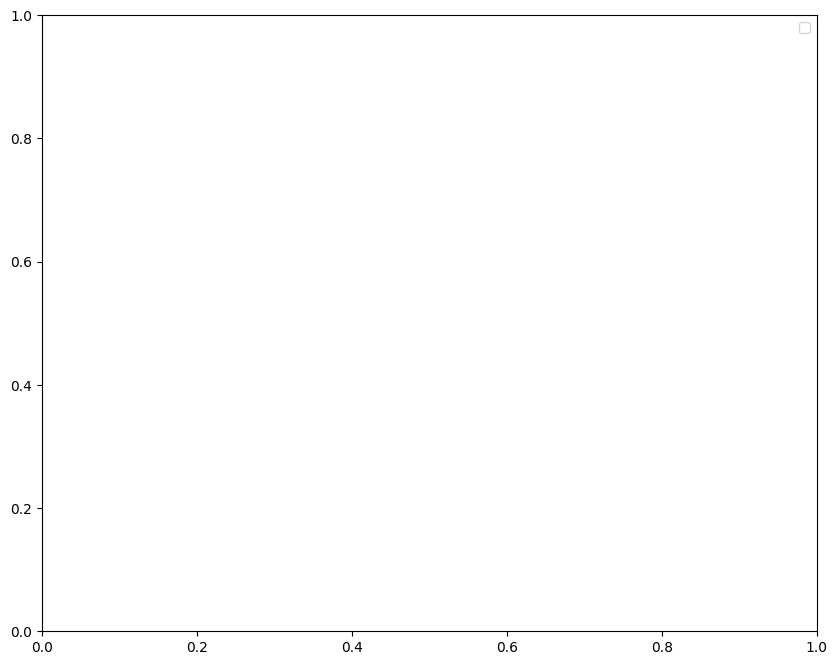

In [ ]:
def plot_predictions(train_data,
                    train_labels, 
                    test_data, 
                    test_labels, 
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 8))
    plt.legend()

plot_predictions(X_train, y_train, X_test, y_test)

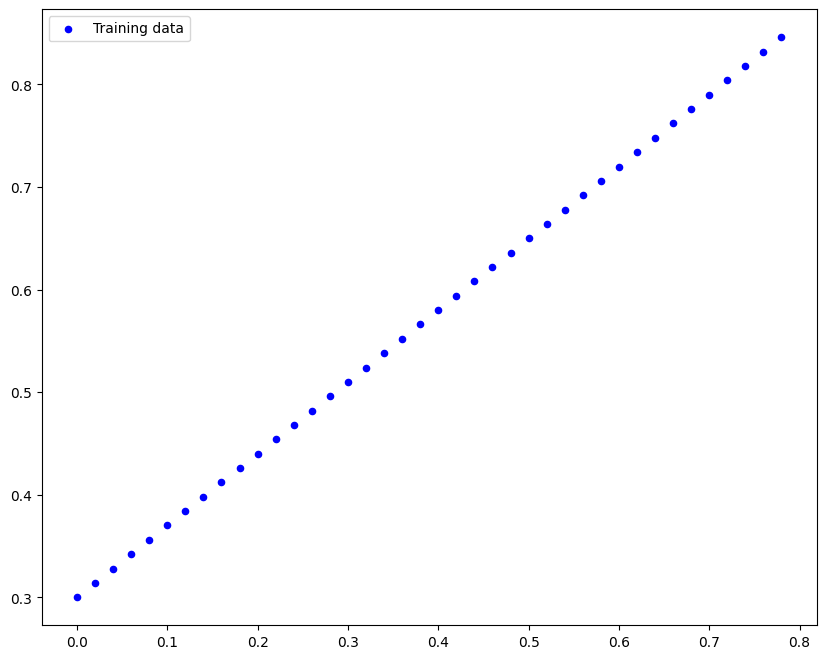

In [ ]:
def plot_predictions(train_data,
                    train_labels, 
                    test_data, 
                    test_labels, 
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 8))

    # Plot training data in blue
    plt.scatter(train_data, # x axis 
                train_labels, # y axis
                c='b', # marker color 
                s = 20, # marker size 
                label = 'Training data')
    plt.legend()

plot_predictions(X_train, y_train, X_test, y_test)

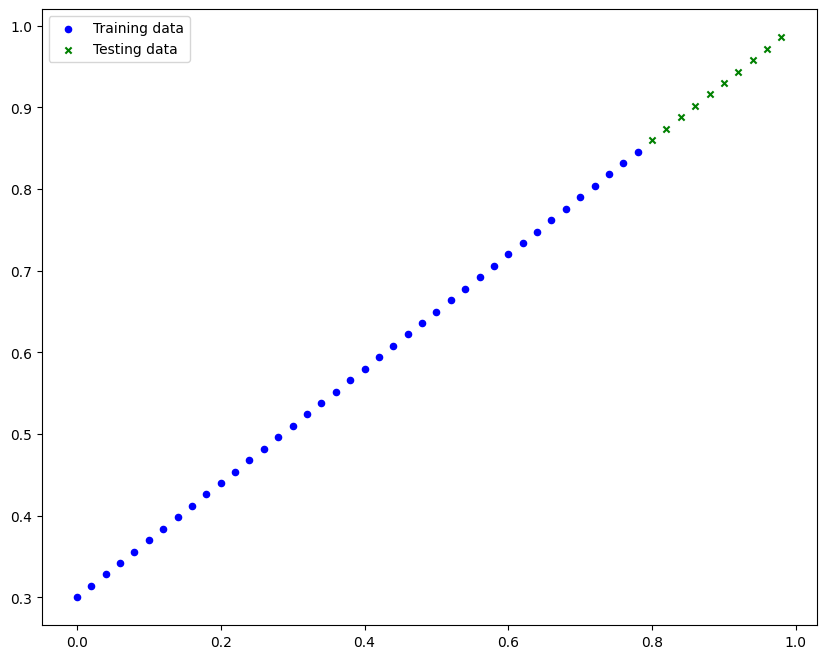

In [ ]:
def plot_predictions(train_data,
                    train_labels, 
                    test_data, 
                    test_labels, 
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 8))

    # Plot training data in blue
    plt.scatter(train_data, # x axis 
                train_labels, # y axis
                c='b', # marker color 
                s = 20, # marker size 
                label = 'Training data')

    plt.scatter(test_data, # x axis
                test_labels,# y axis
                marker = 'x', # marker style
                c = 'g', # marker color
                s = 20, # marker size 
                label = 'Testing data')

    plt.legend()

plot_predictions(X_train, y_train, X_test, y_test)

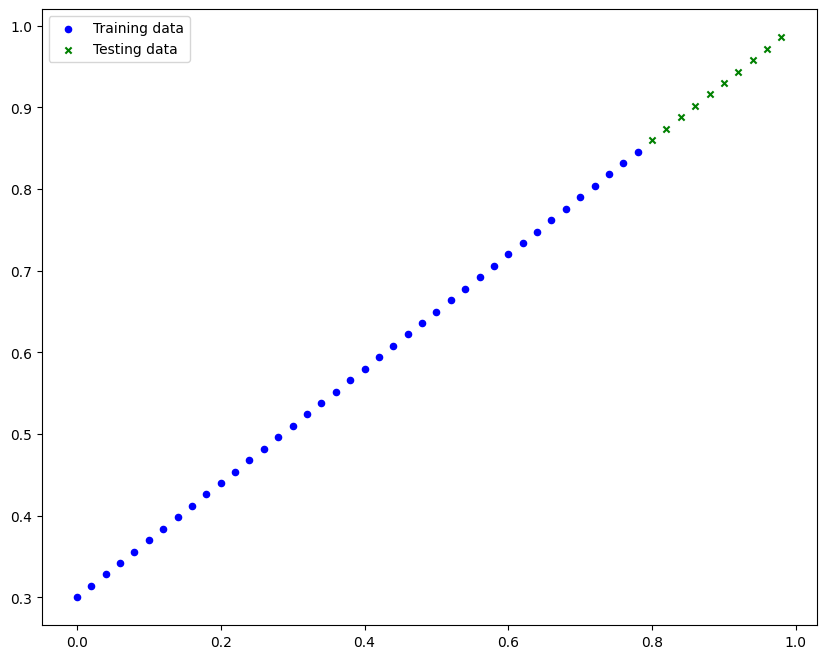

In [ ]:
def plot_predictions(train_data,
                    train_labels, 
                    test_data, 
                    test_labels, 
                    predictions = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 8))

    # Plot training data in blue
    plt.scatter(train_data, # x axis 
                train_labels, # y axis
                c='b', # marker color 
                s = 20, # marker size 
                label = 'Training data')

    plt.scatter(test_data, # x axis
                test_labels,# y axis
                marker = 'x', # marker style
                c = 'g', # marker color
                s = 20, # marker size 
                label = 'Testing data')

    if predictions is not None:
        # Plot the predictions in red (predictoins were made on the test data)
        plt.scatter(test_data, predictions, marker = 'x', c = 'r', s = 20, label = 'Predictions')
    plt.legend(prop={'size': 20})

plot_predictions(X_train, y_train, X_test, y_test)

### 2. Build Model

In [84]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
    
    # forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

`nn.Parameter` = "Hey PyTorch, this tensor should be learned and updated during training."

| Feature                     | Regular Tensor | `nn.Parameter` |
| --------------------------- | -------------- | -------------- |
| Tracked by model            | ❌ No           | ✅ Yes          |
| Learns during training      | ❌ No           | ✅ Yes          |
| Shows up in `.parameters()` | ❌ No           | ✅ Yes          |


In [85]:
tensor = torch.randn(1)
tensor

tensor([0.2345])

In [86]:
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [87]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making predictions using `torch.inference_mode()`

In [88]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [89]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


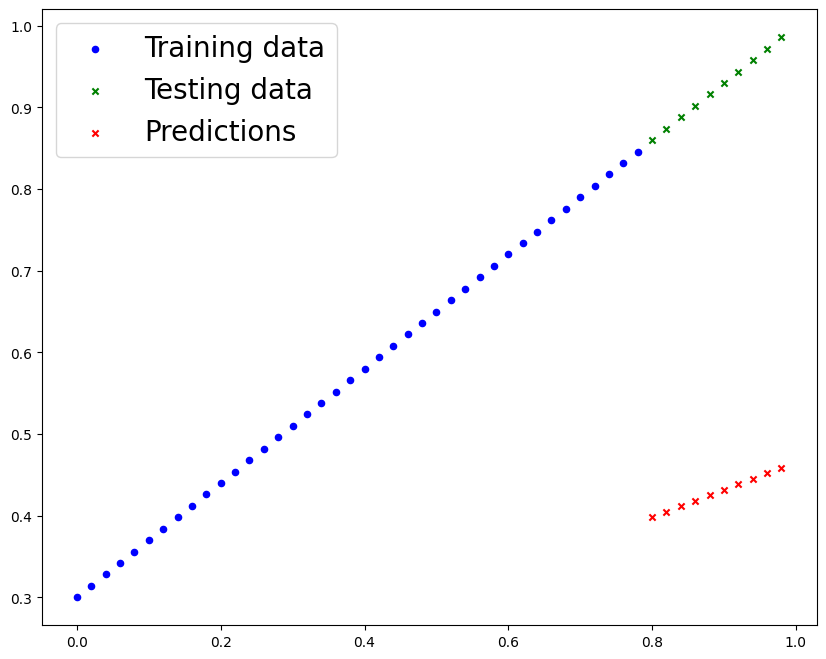

In [91]:
plot_predictions(X_train, y_train, X_test, y_test,y_preds)